In [46]:
# Exciting Last homework
import matplotlib.pyplot as plt
import numpy as np
import math
import csv
import pandas as pd
import scipy.stats as stats

In [28]:
data = pd.read_csv('all_weeks.csv')
data["Total Cases"] = data["New Cases"].cumsum()
data.head()

,Week,New Cases,Total Cases
0,1,4,4
1,2,2,6
2,3,2,8
3,4,4,12
4,5,9,21


In [29]:
TotalCasesArray = data['Total Cases'].to_numpy()
TotalCasesArray = TotalCasesArray * 10

NewCasesArray = data["New Cases"].to_numpy()
NewCasesArray = NewCasesArray * 10
#TotalCasesArray

array([    40,     60,     80,    120,    210,    340,    510,    960,
         1490,   2370,   3700,   5990,   9120,  14070,  20220,  28140,
        36820,  45340,  52990,  59880,  65340,  69430,  72610,  75020,
        77140,  78600,  79850,  80780,  81430,  81900,  82440,  82900,
        83180,  83400,  83510,  83660,  83760,  83850,  83940,  84010,
        84050,  84130,  84130,  84160,  84180,  84220,  84250,  84310,
        84350,  84360,  84370,  84380,  84380,  84390,  84400,  84400,
        84400,  84410,  84420,  84440,  84440,  84450,  84460,  84480,
        84480,  84480,  84480,  84500,  84500,  84510,  84520,  84530,
        84530,  84530,  84530,  84550,  84550,  84560,  84570,  84570,
        84570,  84570,  84570,  84570,  84580,  84580,  84590,  84590,
        84590,  84590,  84600,  84600,  84620,  84630,  84640,  84640,
        84660,  84690,  84710,  84720,  84750,  84800,  84890,  84920,
        84940,  84960,  84990,  85030,  85180,  85250,  85420,  85560,
      

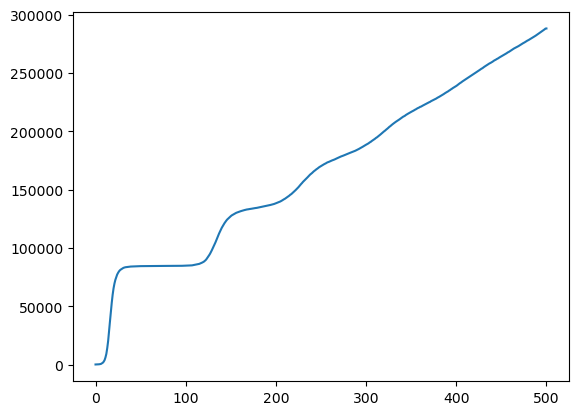

In [4]:
fig, ax = plt.subplots()

ax.plot(TotalCasesArray,label="1")

In [163]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data["Week"][1:16],np.log(NewCasesArray[1:16]))
print(slope,intercept,p_value,std_err)

0.45685444747727705 -0.24547116306881422 6.83675455355577e-14 0.013917518721647993


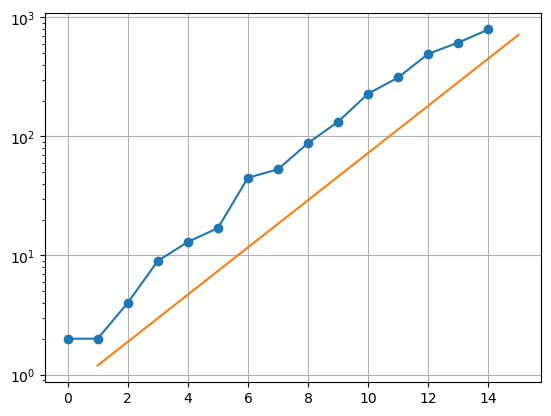

In [166]:
plt.yscale("log")

x = np.linspace(1,15)
y = (1+intercept)*np.exp(slope*x) 

plt.plot(NewCasesArray[1:16],"-o")
plt.plot(x,y)
plt.grid()

In [165]:
# life expectancy u = 100 weeks
# infection g = 2 weeks
# looking at m from the graph it seems (10^1 - 4*10^0)/(2-1)
# true number of cases is 10x
#s sum up the previous cases as well
# use 1/u and 1/g

# use regession fit, maybe in excel
# to get confidecne interval pull confidence interval out of the regession method
# 

u = 1/100
g = 1/2
#m = 0.4697
m = slope
#m = (1500 - 4*10^(1))/(8-0)
#m = (10^1-4*10^0)/(2-1)
R0 = 1 + m/(g+u)
print(R0)

degrees_freedom = len(data[1:15]) - 2

# Get the critical t-value for 95% confidence
confidence = 0.95
alpha = 1 - confidence
t_critical = stats.t.ppf(1 - alpha/2, degrees_freedom)

margin_of_error = t_critical * std_err

# Calculate the confidence interval for the slope
lower_bound = slope - margin_of_error
upper_bound = slope + margin_of_error

R0_lower = 1 + lower_bound/(g+u)

R0_up = 1 + upper_bound/(g+u)
print(str(R0_lower)+ ","+str(R0_up))
#1.89 R0

1.8957930342691707
1.8363348610381758,1.9552512075001656


In [56]:
# trying Prevelance method
u = 1/100
g = 1/2
ieq = 7/1000
R0 = 1/(1-ieq*(g/u+1))
print(R0)

#95% confidence interval:
Upper_end = ieq + 1.96*np.sqrt(ieq * (1-ieq)/1000)
Lower_end = ieq - 1.96*np.sqrt(ieq * (1-ieq)/1000)

R0_upper = 1/(1-Upper_end*(g/u+1))
R0_lower = 1/(1-Lower_end*(g/u+1))

print(str(R0_lower)+","+str(R0_upper))
#confidence interval using proportions
#from class

1.5552099533437014
1.1030928116663554,2.6353379999507043


In [59]:
# seroPrevalence
# R0 = 1/(1-seroprevalence)
Sero = 517/1000

print(1/(1-Sero))

Upper_end = Sero + 1.96*np.sqrt(Sero * (1-Sero)/1000)
Lower_end = Sero - 1.96*np.sqrt(Sero * (1-Sero)/1000)

R0_upper = 1/(1-Upper_end)
R0_lower = 1/(1-Lower_end)

print(str(R0_lower)+","+str(R0_upper))

2.070393374741201
1.945629752143622,2.2122543130294745


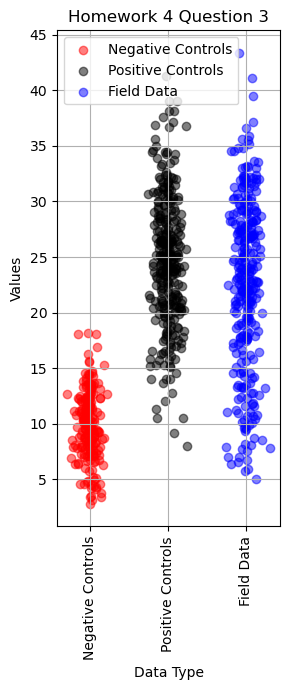

In [59]:
Negative_data = np.genfromtxt('HW4_Q3_neg.csv', delimiter=',')
positive_data = np.genfromtxt('HW4_Q3_pos.csv', delimiter=',')
all_data = np.genfromtxt('HW4_Q3_data.csv', delimiter=',')

jitter = 0.1  # Adjust jitter amount as needed
alpha = 0.5   # Adjust transparency as needed

plt.figure(figsize=(3, 7))
plt.scatter(np.random.normal(1, jitter, len(Negative_data)), Negative_data, color='red', alpha=alpha, label='Negative Controls')
plt.scatter(np.random.normal(2, jitter, len(positive_data)), positive_data, color='black', alpha=alpha, label='Positive Controls')
plt.scatter(np.random.normal(3, jitter, len(all_data)), all_data, color='blue', alpha=alpha, label='Field Data')

plt.xticks([1, 2, 3], ['Negative Controls', 'Positive Controls', 'Field Data'])
plt.xticks(rotation = 90)
plt.xlabel('Data Type')
plt.ylabel('Values')
plt.title('Homework 4 Question 3')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('HW4Q3.png')

In [152]:

def Specificty(c):
    #tn/tn+fp
    # c is allowed to change I just need to use the equations and compare the value to that of the negative controls and
    # see if it is a true negative or false positive type thing!
    true_negative = 0
    false_positive = 0
    
    Negative_data = np.genfromtxt('HW4_Q3_neg.csv', delimiter=',')
    for value in Negative_data:
        if c > value:
            false_positive += 1
        else:
            true_negative += 1
        
    Specificity = true_negative/(false_positive + true_negative)
    return(1-Specificity)

def Sensitiviy(c):
    #tp/(tp+fN)
    true_positive = 0
    false_negative = 0
    positive_data = np.genfromtxt('HW4_Q3_pos.csv', delimiter=',')
    for value in positive_data:
        if c < value:
            false_negative +=1
        else:
            true_positive +=1
    
    sensitivity = true_positive/(false_negative+true_positive)
    return(1-sensitivity)

def phi(c):
    #npos/n
    all_data = np.genfromtxt('HW4_Q3_data.csv', delimiter=',')
    npositive = 0
    n = 0
    
    for value in all_data:
        n += 1
        if value > c:
            npositive +=1
    phi_tilda = npositive/n
    return(phi_tilda)


def theta(c):
    if (Sensitiviy(c) + Specificty(c) - 1) > 0:
        theta = (phi(c) - (1-Specificty(c)))/(Sensitiviy(c) + Specificty(c) - 1)
    else:
        theta = 0
    return(theta)


def youden(c):
    J = Specificty(c) + Sensitiviy(c) - 1
    return(J)

In [155]:
Specificty(15)

0.96

In [154]:
Sensitiviy(15)

0.96

In [156]:
phi(15)

0.8066666666666666

In [158]:
theta(14.76)

0.8369565217391305

In [124]:
youden(14.4)

0.8933333333333333

In [125]:
maxYouden = 0
maxC = 0
for i in np.arange(0,25,0.1):
    if youden(i) > maxYouden:
        maxYouden = youden(i)
        maxC = i
print(maxYouden, maxC)
print(theta(maxC))

0.9199999999999999 14.8
0.7631884057971013


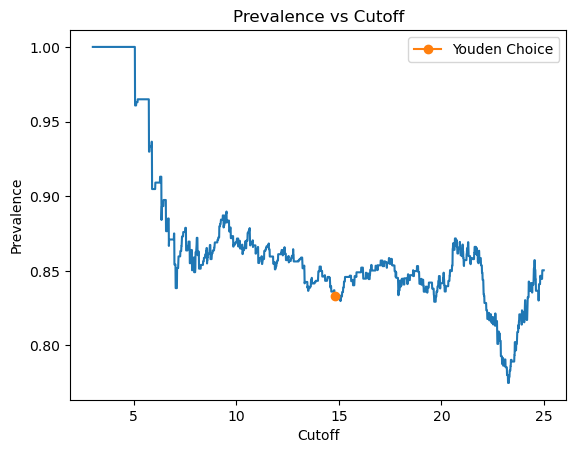

In [135]:
C = np.arange(3,25,0.01)
y = []
for value in C:
    y.append(theta(value))

plt.plot(C,y)
plt.plot(maxC,theta(maxC),marker="o",label="Youden Choice")
plt.xlabel("Cutoff")
plt.ylabel("Prevalence")
plt.title("Prevalence vs Cutoff")
plt.legend()
plt.savefig('HW4Q3C.png')

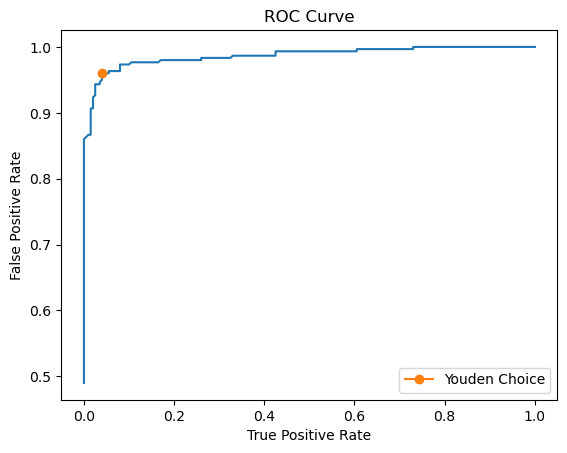

In [134]:
C = np.arange(0,25,0.01)
x = []
y = []
for value in C:
    x.append(1 - Specificty(value))
    y.append(Sensitiviy(value))

plt.plot(x,y)
plt.plot((1-Specificty(maxC)),Sensitiviy(maxC),marker="o",label="Youden Choice")
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig('HW4Q3C.png')